In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告

## 2. logistic_regression（逻辑回归）

In [3]:
data_1=pd.read_csv('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex2-logistic regression/ex2data1.txt'
                   ,header=None, names=['Exam1', 'Exam2','Admitted_or_not'])
data_1.insert(0, 'x0', 1)
data_1.head()

,x0,Exam1,Exam2,Admitted_or_not
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


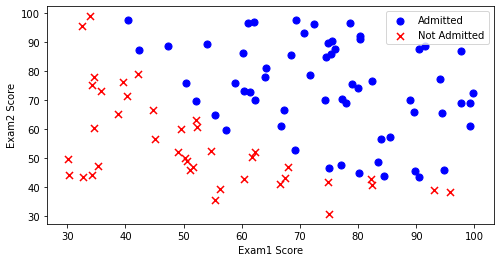

In [11]:
## plot scatter
positive = data_1[data_1['Admitted_or_not'].isin([1])]  #分类，一类数据放到一起
negative = data_1[data_1['Admitted_or_not'].isin([0])]

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

In [4]:
# 定义代价函数 和 sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def cost(theta, X, Y):
    first = Y * np.log(sigmoid(X@theta.T))
    second = (1 - Y) * np.log(1 - sigmoid(X@theta.T))
    return -1 * np.mean(first + second)
def gradient(theta, X, Y):
    return (1/len(X) * X.T @ (sigmoid(X @ theta.T) - Y)) #下降一步的值

In [5]:
# set X(training data) and Y(target variable)
X = data_1.iloc[:, 0: -1].values
Y = data_1.iloc[:, -1].values
theta = np.zeros(3)
result = opt.fmin_tnc(func=cost, x0=theta,fprime=gradient, args=(X, Y)) #运用优化算法求出theta，而不是梯度下降
print(result)  #得到 theta0,theta1,theta2
res = opt.minimize(fun=cost, x0=np.array(theta), args=(X, np.array(Y)), method='Newton-CG', jac=gradient)
res

(array([-25.16131856,   0.20623159,   0.20147149]), 36, 0)


     fun: 0.20349770426553998
     jac: array([-2.85342794e-06, -3.50853296e-05, -1.62061639e-04])
 message: 'Optimization terminated successfully.'
    nfev: 71
    nhev: 0
     nit: 27
    njev: 178
  status: 0
 success: True
       x: array([-25.16557602,   0.20626565,   0.20150593])

In [8]:
# 计算准确率和错误率，可以用 test dataset 来算
def predict(theta,X):
    probability=sigmoid(X @ theta.T)
    return [1 if x>=0.5 else 0 for x in probability]  #threshold 设置为0.5

In [9]:
theta_result=np.matrix(result[0])
predictions=predict(theta_result,X)
print(classification_report(Y, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



# 决策边界： x2=-(theta0/theta2)x0-(theta1/theta2)x1

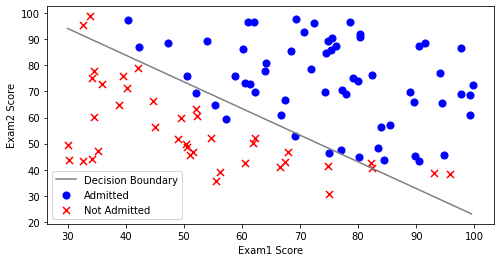

In [12]:
coef = -res.x / res.x[2]  # x2方程，就是决策边界
x = np.arange(30, 100, 0.5)
y = coef[0] + coef[1] * x

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x, y, label='Decision Boundary', c='grey')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

## 3. 正则化逻辑回归

In [2]:
data_2=pd.read_csv('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex2-logistic regression/ex2data2.txt'
                   ,header=None, names=['Test1', 'Test2','Accept_or_not'])
data_2.head()

,Test1,Test2,Accept_or_not
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


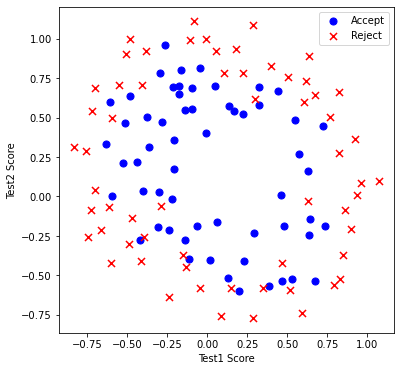

In [3]:
## plot scatter
positive = data_2[data_2['Accept_or_not'].isin([1])]  #分类，一类数据放到一起
negative = data_2[data_2['Accept_or_not'].isin([0])]

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accept')
ax.scatter(negative['Test1'], negative['Test2'], s=50, c='r', marker='x', label='Reject')
ax.legend()
ax.set_xlabel('Test1 Score')
ax.set_ylabel('Test2 Score')
plt.show()

In [3]:
## 处理数据，最高6次方，通过正则化消除过度拟合
def feature_mapping(x, y, power, as_ndarray=False):
    data = {'f{0}{1}'.format(i-p, p): np.power(x, i-p) * np.power(y, p)
                for i in range(0, power+1)
                for p in range(0, i+1) }
    if as_ndarray:
        return pd.DataFrame(data).values  #取出 value ，方便计算
    else:
        return pd.DataFrame(data)  #保留 df ,方便可视化

In [4]:
X1 = np.array(data_2.Test1)
X2 = np.array(data_2.Test2)
data_map = feature_mapping(X1, X2, power=6)
print(data_map.shape)
data_map.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [22]:
def cost(theta, X, Y):
    first = Y * np.log(sigmoid(X@theta.T))
    second = (1 - Y) * np.log(1 - sigmoid(X@theta.T))
    return -1 * np.mean(first + second)
def regularize_cost(theta, X, Y,fi=1):
    theta_1 = theta[1:]
    first = Y * np.log(sigmoid(X@theta.T))
    second = (1 - Y) * np.log(1 - sigmoid(X@theta.T))
    third=fi*np.power(theta_1,2).sum()/(2*len(X))
    return -1 * np.mean(first + second)+third

In [23]:
def gradient(theta, X, Y):
    return (1/len(X) * X.T @ (sigmoid(X @ theta.T) - Y)) #下降一步的值
def regularize_gradient(theta, X, Y,fi=1):
    theta_1= theta[1:]
    regularize_num= fi/len(X) * theta_1
    regularized_term = np.concatenate([np.array([0]), regularize_num]) # theta0 不加
    
    return  gradient(theta, X, Y) + regularized_term #矩阵加法，每一项加一个

In [10]:
Y_2 = data_2['Accept_or_not']
theta2 = np.zeros(data_map.shape[1])
X_2 = feature_mapping(X1, X2, power=6, as_ndarray=True)
result2 = opt.fmin_tnc(func=regularize_cost, x0=theta2,fprime=regularize_gradient, args=(X_2, Y_2)) #运用优化算法求出theta，而不是梯度下降
print(result2)  #得到 theta0,theta1,theta2
res2 = opt.minimize(fun=regularize_cost, x0=np.array(theta2), args=(X_2, np.array(Y_2)), method='Newton-CG', jac=regularize_gradient)
res2

(array([ 1.27271026,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
       -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
       -1.45817009, -0.05098418, -0.61558555, -0.27469165, -1.19271298,
       -0.24217841, -0.206033  , -0.04466178, -0.27778949, -0.29539513,
       -0.45645981, -1.04319154,  0.02779373, -0.29244868,  0.0155576 ,
       -0.32742405, -0.1438915 , -0.92467487]), 32, 1)


     fun: 0.5290027297128722
     jac: array([ 4.64317436e-08,  1.04331373e-08, -3.61802419e-08, -3.44397841e-08,
        2.46408233e-08,  1.12246256e-08, -5.13021764e-09, -1.11582358e-08,
        1.23402171e-09,  2.62428040e-08, -3.94916642e-08,  5.21264511e-09,
       -8.98645551e-09,  1.04022216e-08,  3.24793498e-08, -5.20025250e-09,
       -5.87238749e-09,  7.46797548e-10, -4.52162093e-09, -1.47871366e-09,
        1.80405423e-08, -1.62958045e-08,  7.26901438e-10, -5.53694209e-09,
        3.57089897e-09, -3.35135784e-09,  5.51302048e-09,  2.59989451e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 55
  status: 0
 success: True
       x: array([ 1.27274054,  0.62527229,  1.18108684, -2.01996217, -0.91742229,
       -1.43166588,  0.1240061 , -0.36553467, -0.35724013, -0.1751284 ,
       -1.45815894, -0.050989  , -0.61555564, -0.27470555, -1.192815  ,
       -0.24218818, -0.20600633, -0.04473079, -0.27778484, -0.29537856,
       -0.4

In [12]:
def predict(theta,X):
    probability=sigmoid(X @ theta.T)
    return [1 if x>=0.5 else 0 for x in probability]  #threshold 设置为0.5

theta_result_2=np.matrix(result2[0])
predictions_2=predict(theta_result_2,X_2) #把得到的theta放入
print(classification_report(Y_2, predictions_2))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118

